<a href="https://colab.research.google.com/github/coatless-r-n-d/colab-notes/blob/main/06-using-r-via-rpy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rpy2: Interfacing with R in Jupyter Notebook

If we wanted to use additional languages, we would need to verify that a Jupyter extension exists to change the specific cell type. In the case of _R_, we can incorporate _R_ code using the [`{rpy2}`](https://rpy2.github.io/) bridge. This requires installing the package via `pip`:

In [1]:
!pip install rpy2

**Important:** Due to changes in Pandas 2.0, we will need to define `iteritems` when we load pandas for the automatic data frame conversion.

Once the package is installed, we need to load the [Jupyter extension](https://ipython.readthedocs.io/en/stable/config/extensions/index.html) with:

In [2]:
%reload_ext rpy2.ipython

## rpy2 magic commands

Magic commands are used to change the behavior of Jupyter notebook code cell.
With `rpy2`, we have [R magic commands](https://rpy2.github.io/doc/latest/html/interactive.html) to run R code. In particular:

- `%%R`: Run R code in cell
- `%R`: Run single line of R code
- `-i`: Pass variables from Python to R
- `-o`: Return variables from R to Python

### Inline

For example, we can define a new variable `x` in R and, then, export it to Python:

In [3]:
%R x <- c(1, 2, 3) -o x

# Verify in cell it works by using a list comprehension:
[f"{i}: {x[i]}" for i in range(len(x))]

['0: 1.0', '1: 2.0', '2: 3.0']

The `-o` serializes the object from R into Python. So, we can then use Python to access the variable

In [4]:
# Python code
x

array([1., 2., 3.])

### Full cell

By switching to `%%R`, we can use a Jupyter code cell like a normal full feature R cell:

[1] "The mean of x is: 2"


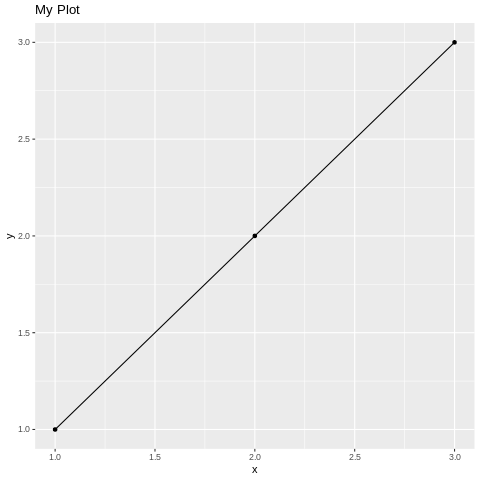

In [5]:
%%R
library(ggplot2)

print(paste0("The mean of x is: ", mean(x)))

df <- data.frame(x = x, y = x)

ggplot(df) +
  aes(x, y) +
  geom_point() +
  geom_line() +
  labs(
    title = "My Plot",
    x = "x",
    y = "y"
  )

Then, we can **write** and **run** any _R_ code we deem feasible.

In [6]:
%%R

# Create a data frame
my_df <- data.frame(
    independent_data = c(1, 2, 3),
    dependent_data = c(4, 5, 6)
)

summary(my_df)


 independent_data dependent_data
 Min.   :1.0      Min.   :4.0   
 1st Qu.:1.5      1st Qu.:4.5   
 Median :2.0      Median :5.0   
 Mean   :2.0      Mean   :5.0   
 3rd Qu.:2.5      3rd Qu.:5.5   
 Max.   :3.0      Max.   :6.0   


Objects defined in prior R code cells will be carried forward with the same state.

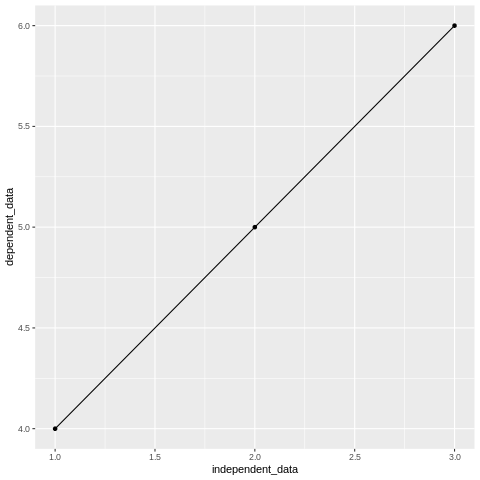

In [7]:
%%R

# Load the ggplot2 library
library(ggplot2)

# Graph the data
ggplot(my_df) +
  aes(x = independent_data,
      y = dependent_data) +
  geom_point() +
  geom_line()

#### Your Turn: Create a code chunk!

Write two different code cells that

1. Print out separately the mean and standard deviation of `x` in `my_df`.
2. Contains _R_ code with an error.

What happens when each cell executes? How does this relate to the native execution of Python code?

In [ ]:
# Code here

## Direct Interface

We can permenantly remain inside of Python by using `rpy2`'s Python API to generate R objects, graphs, and more without writing R code!

In [8]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

# Import essential R packages
stats = importr('stats')
base = importr('base')

# Enable automatic pandas conversion
pandas2ri.activate()

# Create an R vector
x = robjects.FloatVector([1.1, 2.2, 3.3])

# Run R code as a string
result = robjects.r('''
    x <- c(1.1, 2.2, 3.3)
    mean(x)
''')

# Show the result from running string text
print(result)

# Call the R function directly
mean_result = base.mean(x)

print(mean_result)

[2.2]
[2.2]


## R DataFrame to Pandas

The interface further allows us to automatically convert between an R data frame and a Pandas Data Frame in python.

In [13]:
import pandas as pd
# Required for >= Pandas 2.0
pd.DataFrame.iteritems = pd.DataFrame.items
# Custom definition

# Load required rpy2 modules
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Active Pandas DataFrame to R conversion
pandas2ri.activate()

# Define the data frame in Python
df = pd.DataFrame({'x': [1,2,3], 'y': ['a', 'b', 'c']})

# Convert it to R
r_dataframe = robjects.conversion.py2rpy(df)

# Use R functions on the data
r_code = '''
    function(df) {
        summary(df)
    }
'''

# Initialize an R function while in Python
r_function = robjects.r(r_code)

# Apply the function created in R through Python
result = r_function(r_dataframe)
print(result)

       x            y            
 Min.   :1.0   Length:3          
 1st Qu.:1.5   Class :character  
 Median :2.0   Mode  :character  
 Mean   :2.0                     
 3rd Qu.:2.5                     
 Max.   :3.0                     

